# PISA Data
## Communicate your data project
### By: Mohamed Sharif

# Introduction

# Investigation Overview
### We are looking forward to exploring the dataset with paying special attention to the scores of the students and trying to find the things that affect their scores using multiple visualizations.

Completing work after doing preliminary wrangling in the previous file.
This document explores the cleaned dataset of the PISA 2012.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# reading the cleaned data into a dataframe
df=pd.read_csv('data_cleaned.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# convert intrnt_frst,comp_frst,MISCED into ordered categorical types
ordinal_var_dict = {'intrnt_frst': ['6 years old or younger','7-9 years old','10-12 years old','13 years old  or older',
                                    'Never']
                   ,'comp_frst': ['6 years old or younger','7-9 years old','10-12 years old','13 years old  or older',
                                    'Never'],
                    'MISCED':['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4',
                              'ISCED 5B','ISCED 5A, 6']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Dataset Overview
## What is the structure of your dataset?
There are 485490 students that took part in the PISA 2012 test, they provide answers and inputs for  30 variables like  country, gender, their maths score,...etc. We had to convert some data from categories to numeric to combine them.


## The distribution of the Students score
#### We can see from the visualization that The data is normally distributed, and that the peak(the mode) and the mean is nearly at 469.

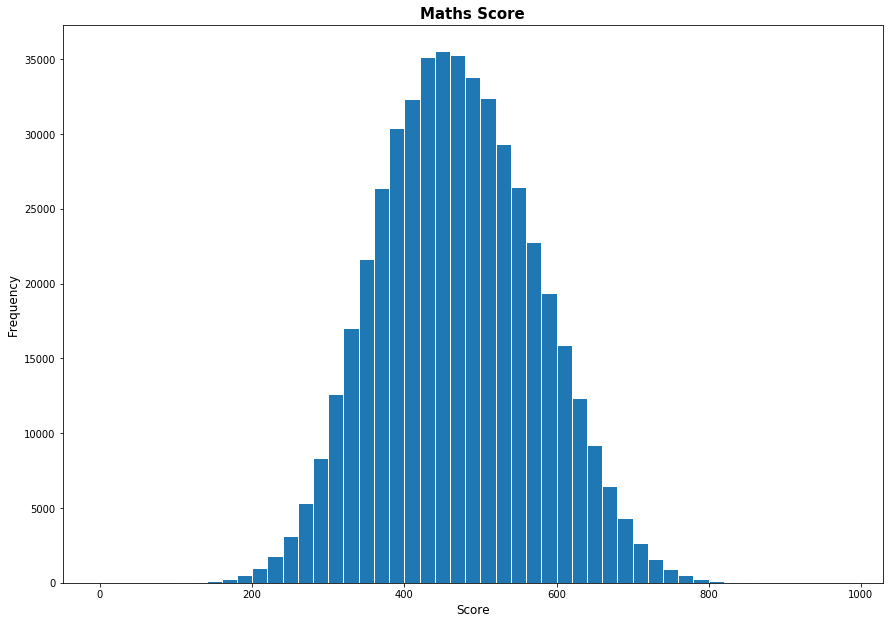

In [5]:
# start with a standard histogram plot of the score
binsize = 20
bins = np.arange(0, df['score'].max()+binsize, binsize)

plt.figure(figsize=[14.7,10.27])
plt.hist(data = df, x = 'score', bins = bins,edgecolor='white')
plt.title('Maths Score',size=15,weight='bold')
plt.xlabel('Score',size=12)
plt.ylabel('Frequency',size=12);

# The correlation between different quantitative variables
## We tested the correelation between the different variables and in particular the overall score
### We had some interesting facts from the correlation matrix, which can summarize the whole data:
#### For the parents: Unsurprisengly, we can see that there is a moderate positive correlation between the family being wealth, the SQ of the two parents, and the parents education.
### Things that affect score:
#### Anxious: Negative, the more anxious you get the less score you acheive.
#### Family metrics(wealth,SQ levels, parent_ed) have a positive moderate correlation with the score.
#### math self_efficacy: the more self_efficacy students have the higher score they get.

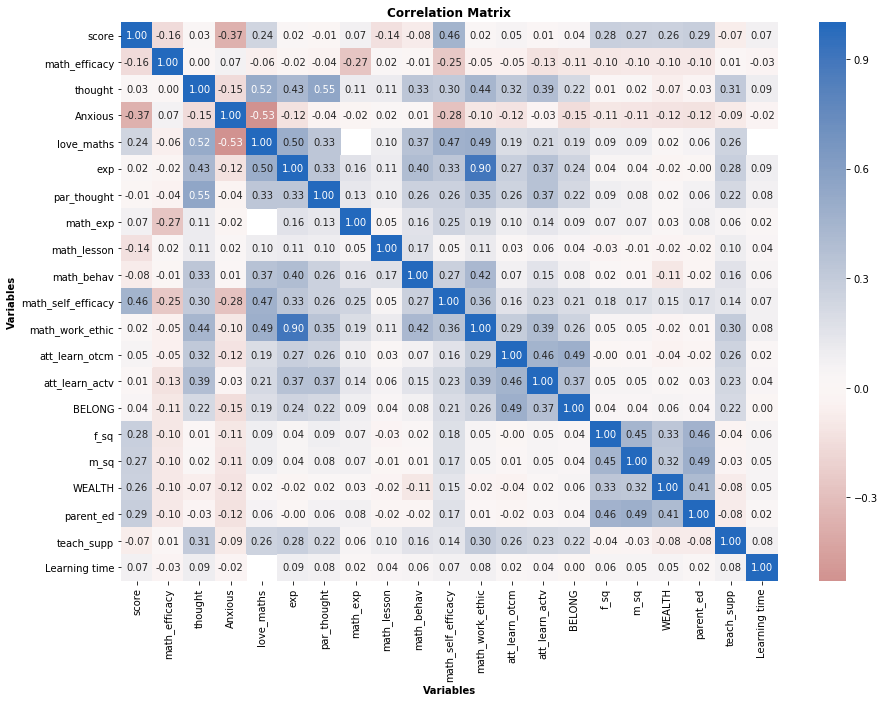

In [6]:
# Heat map chart of the different variables that may affect the score
plt.figure(figsize=[14.7,10.27])
numeric_variables=['score','math_efficacy','thought','Anxious','love_maths','exp','par_thought','math_exp',
              'math_lesson','math_behav','math_self_efficacy','math_work_ethic','att_learn_otcm',
              'att_learn_actv','BELONG','f_sq','m_sq','WEALTH','parent_ed','teach_supp',
             'Learning time']
sb.heatmap(df[numeric_variables].corr(), annot = True, fmt = '.2f',cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix',weight='bold')
plt.xlabel('Variables',weight='bold')
plt.ylabel('Variables',weight='bold')
plt.show();

# The effect of MISCED on score
## We performed a violin plot to test the effect of the highest parents education on studetns score.
### We can see that there is a difference between the scores based on the parents education, and in particular between those parents who got a ISCED 3 level education and higher. We can see that the studetns with parents have ISCED 6 scored the highest among all groups.

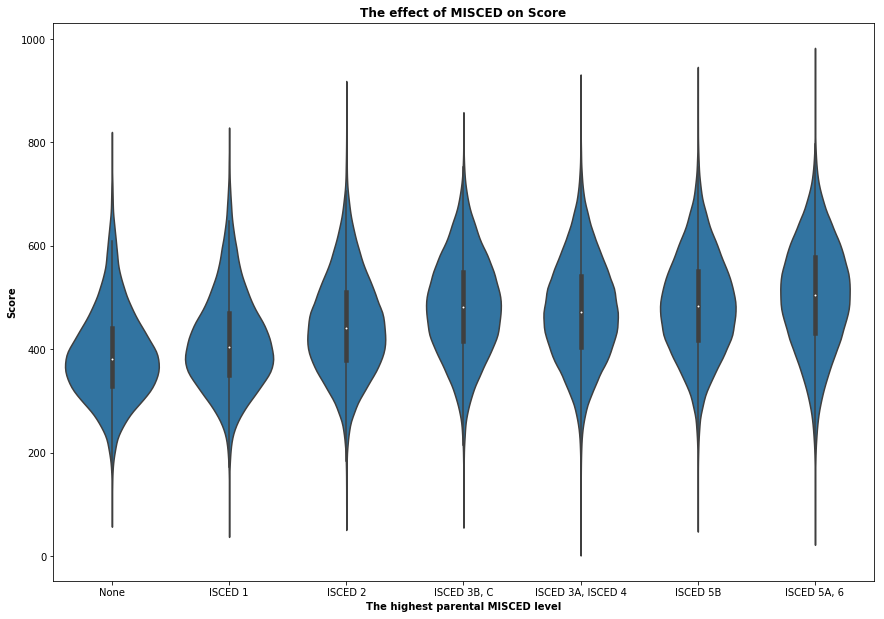

In [9]:
# Violinplot to test the effect of MISED on score
plt.figure(figsize = [14.7, 10.27])
default_color=sb.color_palette()[0]
sb.violinplot(data = df, x = 'MISCED', y = 'score',color = default_color)
plt.title('The effect of MISCED on Score',weight='bold')
plt.xlabel('The highest parental MISCED level',weight='bold')
plt.ylabel('Score',weight='bold');

# The effect of the age of first using computer on score
## With the help of the following plot,  we figured out that the earlier the students get to use computer the more scores they are likely to get, with a drastic decrease in scores for those who didn't use computer at all before.

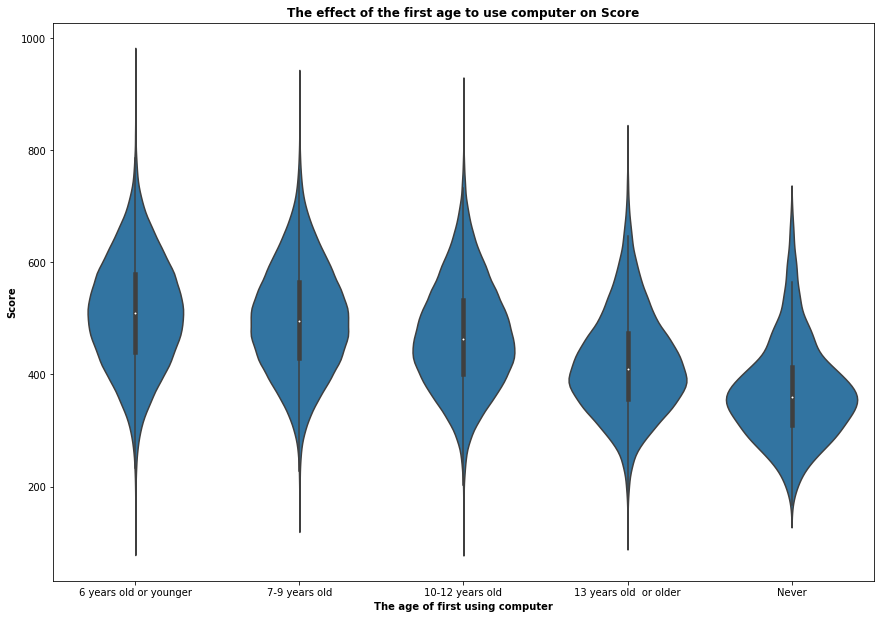

In [10]:
#Violing plot to test if the comp_frst categories affect the score
plt.figure(figsize = [14.7, 10.27])
sb.violinplot(data = df, x = 'comp_frst', y = 'score',color = default_color)
plt.title('The effect of the first age to use computer on Score',weight='bold')
plt.xlabel('The age of first using computer',weight='bold')
plt.ylabel('Score',weight='bold');

# The effect of first age using computer on anxious effect on score
## We wanted to see how the scores of the different age groups when they first used computer got affected by the anxiety
### We can see that the scores of the students who used computers get deteriorated very rapidly with anxious, however the grades of those, who used it at the age of 13 or older or have never used it, get lowered by anxiety but not by very much.

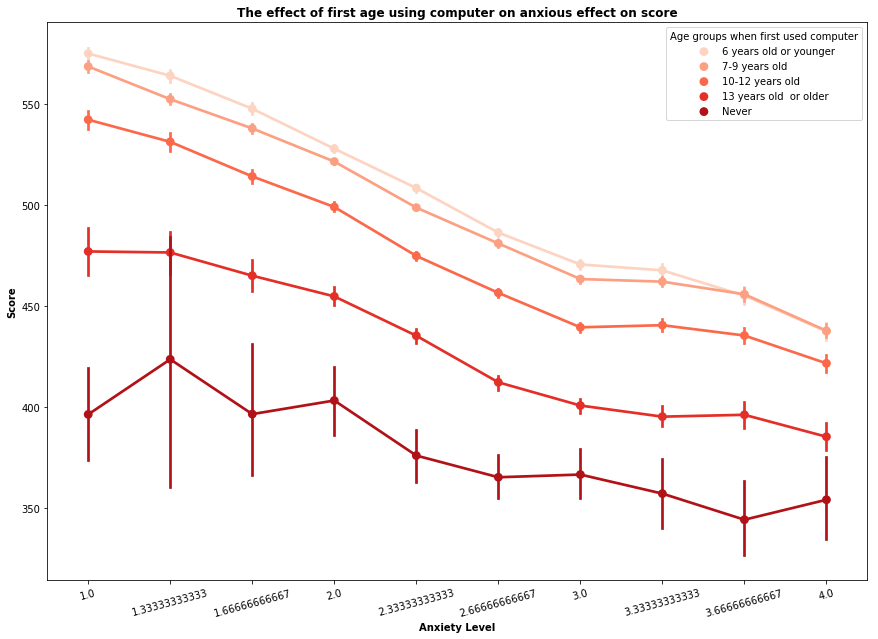

In [15]:
# drawing a point plot to test the effect of anxiety on the scores of different groups
plt.figure(figsize = [14.7, 10.27])
sb.pointplot(data = df,  hue= 'comp_frst', x= 'Anxious', y= 'score',palette = 'Reds')
plt.xticks(rotation=15)
plt.title('The effect of first age using computer on anxious effect on score',weight='bold')
plt.xlabel('Anxiety Level',weight='bold')
plt.ylabel('Score',weight='bold')
plt.legend(title="Age groups when first used computer")
plt.show();

# The effect of on anxious effect on score
## We wanted to see how the scores of genders got affected by the anxiety
#### We can see that the calm males perform better than calm females, and that anxious females perform better than anxious males, while this may be attributed, to an extent, to the fact that anxiety affects score, it is still interesting to see this overlap with anxiety.

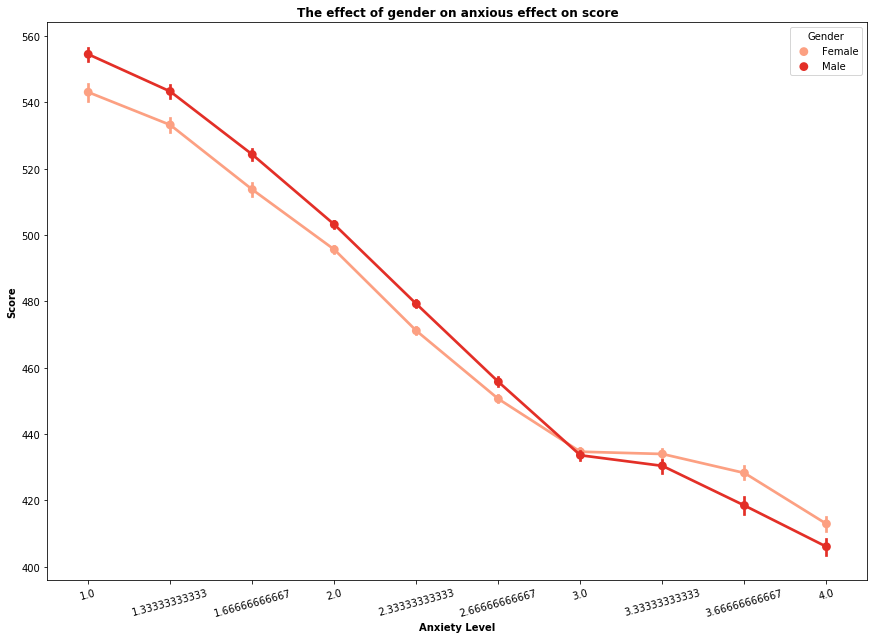

In [14]:
# drawing a point plot to test the effect of anxiety on the scores of different genders
plt.figure(figsize = [14.7, 10.27])
sb.pointplot(data = df,  hue= 'gender', x= 'Anxious', y= 'score',palette = 'Reds')
plt.xticks(rotation=15)
plt.title('The effect of gender on anxious effect on score',weight='bold')
plt.xlabel('Anxiety Level',weight='bold')
plt.ylabel('Score',weight='bold')
plt.legend(title="Gender")
plt.show();